# Simple stock problem solved using genetic algorithm

In [1]:
##Importación de librerias 

import numpy as np
import matplotlib.pylab as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/home/morales/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
G=[]
##Definición de funciones 

##Función que calcula el fitness a un individuo que tiene una estrategía = estrategia,para unas determinadas
##probabilidades y ganancias

def fitness(estrategia,probabilidades,ganancias):
    f=100
    #ProbTemporal=np.array(probabilidades)
    for i in range(len(estrategia)):
        G.append(ganancias[:])
        rn=np.random.random()
        if estrategia[i] == 1 and rn <= probabilidades[0]:
                f*=(100+ganancias[0])/100.
                ganancias[0]-=0.1
                ganancias[1]+=0.09
                ganancias[2]+=0.08
                probabilidades[0]-=1/(1+probabilidades[0])
                probabilidades[1]+=1/(1+probabilidades[1])
                probabilidades[2]+=1/(1+probabilidades[2])
        elif estrategia[i] == 2 and rn <=probabilidades[1]:
                f*=(100+ganancias[1])/100.
                ganancias[0]-=0.05
                ganancias[1]-=0.12
                ganancias[2]+=0.08
                probabilidades[0]+=1/(1+probabilidades[0])
                probabilidades[1]-=1/(1+probabilidades[1])
                probabilidades[2]+=1/(1+probabilidades[2])
        elif estrategia[i] == 3 and rn <= probabilidades[2]:
                f*=(100+ganancias[2])/100.
                ganancias[0]+=0.11
                ganancias[1]-=0.08
                ganancias[2]-=0.07
                probabilidades[0]+=1/(1+probabilidades[0])
                probabilidades[1]+=1/(1+probabilidades[1])
                probabilidades[2]-=1/(1+probabilidades[2])
        if probabilidades[0]>1:
            probabilidades[0]=1
        elif probabilidades[0]<0:
            probabilidades[0]=0
        if probabilidades[1]>1:
            probabilidades[1]=1
        elif probabilidades[1]<0:
            probabilidades[1]=0
        if probabilidades[2]>1:
            probabilidades[2]=1
        elif probabilidades[2]<0:
            probabilidades[2]=0
        
            
    return f


#Función que calcula el fitness para cada uno de los N individuos de una generación
def promfitness():
    SumFit=[]
    for i in range(N):
        #Se redefine probabilidades para que las probabilidades iniciales sean las mismas para cada individuo
        probabilidades=np.array(Prob)
        ganancias=np.array(Gan)
        
        #SumFit es un vector con el fitness de cada estrategia de la generacion (Se renueva cada generación, no se guarda)
        SumFit.append(fitness(estrategias[i],probabilidades,ganancias))
    return SumFit


In [3]:
#Se crea una semilla aleatoria para comprobar que el programa funciona sin importar las caracteristicas
np.random.seed(np.random.randint(0,100))

estrategias=[]

#E es el numero de empresas, o de posibles acciones en cada paso de tiempo
E=3

#Se generan las ganancias como numeros enteros (no tienen que ser enteros necesariamente) para cada una de las empresas
#Gan es la tupla de las ganancias iniciales
Gan=tuple((np.random.random(E)*2-1)*100)

ganancias=(np.array(Gan))

#Prob es un invariante con las probabilidades iniciales para cada individuo
Prob=tuple(np.random.random(E))

#probabilidades es un vector con las probabilidades que van variando para cada individuo, su valor inicial es Prob
probabilidades=np.array(Prob)

#N es el numero de individuos por generación
N=100

#l es el numero de genes, en este caso es la cantidad de acciones que realiza cada individuo
l=500

#Para cada individuo se crea un vector de l espacios con valores entre 0 y E, donde el número e representa la empresa e
for i in range(N):
    estrategias.append(np.random.randint(1,8,l))
estrategias=np.array(estrategias)

In [115]:
#m es el numemero de generaciones
m=500

#Se generan espacios para guardar el maximo u el minimo de cada generación
maximos=[]
minimos=[]

BestF = 0
#Se itera para las m generaciones
for j in range(m):    
    #Se calcula el fitness para cada uno de los individuos de la generación m
    SumFit=promfitness()
    #BestE es la mejor estrategia que se ha encontrado y BestF el fitness de la mejor estrategia
    if np.max(SumFit)>BestF:
        BestE = estrategias[SumFit >= np.sort(SumFit)[-1]]
        BestF = np.max(SumFit)
    #Se toma el valor del maximo y el minimo fitness de la generacion
    maximos.append(np.max(SumFit))
    minimos.append(np.min(SumFit))
    
    #Se escoge a la elite como todas las estrategias que tengan un fitness mejor o igual que el decimo mejor
    elite = np.array(estrategias)[SumFit >= np.sort(SumFit)[-10]]
    #print(elite)
    
    #A continuación se crean N nuevos individuos (estrategias) que surgen de la reproducción (unión) de 2 individuos 
    #escogidos al azar entre los individuos de la elite
    for i in range(N):
        
        #Se crea un vector de numeros aleatorios donde el primero es el primer individuo de la elite que se toma, y 
        #el segundo es el segundo individuo. El tercero es un entero entre 0 y l el cual representa donde se hace el 
        #corte, i.e hasta donde se toman los genes del primero y desde donde se toman los del segundo.
        
        rn = np.append(np.random.randint(0,len(elite),2),np.random.randint(0,l+1))
        estrategias[i] = np.append(elite[rn[0]][0:rn[2]],elite[rn[1]][rn[2]:l+1])
        
        #A continuación se realizan algunas variaciones aleatorias que representan las mutaciones
        estrategias[i][np.random.randint(0,l)]=np.random.randint(0,E)
        estrategias[i][np.random.randint(0,l)]=np.random.randint(0,E)
        estrategias[i][np.random.randint(0,l)]=np.random.randint(0,E)
        estrategias[i][np.random.randint(0,l)]=np.random.randint(0,E)
        estrategias[i][np.random.randint(0,l)]=np.random.randint(0,E)
        estrategias[i][np.random.randint(0,l)]=np.random.randint(0,E)
        
   

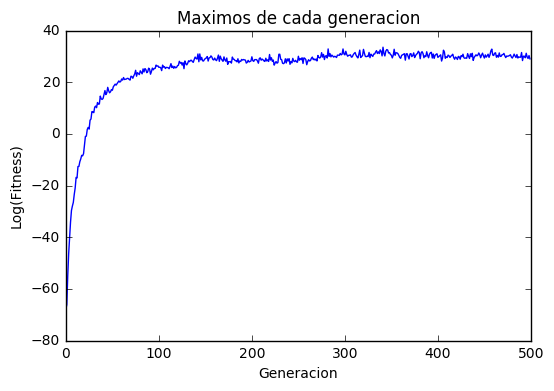

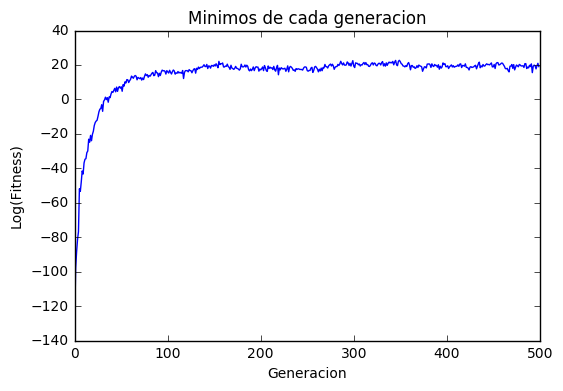

In [127]:
#Se grafican los maximos y minimos de cada generación para observar el comportamiento a largo plazo
plt.plot(np.log(maximos))
plt.title("Maximos de cada generacion")
plt.xlabel("Generacion")
plt.ylabel("Log(Fitness)")


plt.figure()
plt.plot(np.log(minimos))
plt.title("Minimos de cada generacion")
plt.xlabel("Generacion")
plt.ylabel("Log(Fitness)")

In [128]:
#Se imprime la mejor estrategia encontrada, el mejor fitness y los fitness de las soluciones triviales
print(BestE[0])
print(BestF)
www=np.ones(len(BestE[0]))*2
print(fitness(www,probabilidades,ganancias))
www1=np.ones(len(BestE[0]))
print(fitness(www1,probabilidades,ganancias))
www2=np.zeros(len(BestE[0]))
print(fitness(www2,probabilidades,ganancias))


[1 1 1 1 0 1 2 1 1 1 0 1 2 1 7 1 1 1 1 0 2 1 0 1 1 2 1 0 1 1 1 2 1 1 1 1 0
 1 1 2 1 1 0 2 1 1 1 1 2 0 1 0 1 0 1 1 1 2 0 0 0 0 1 1 0 1 0 1 1 0 0 2 1 1
 1 1 2 1 1 1 2 1 1 0 2 1 2 1 1 2 1 1 2 1 4 2 0 1 0 1 0 0 0 0 2 1 0 1 1 1 0
 0 1 2 1 1 1 2 0 0 0 1 1 1 1 1 2 0 1 0 1 1 2 0 1 1 2 2 1 1 0 1 0 1 2 0 1 1
 0 2 1 0 1 6 0 0 1 2 1 2 1 2 1 2 1 1 0 0 1 1 2 1 1 0 0 0 1 1 2 1 0 1 1 2 0
 1 1 1 1 1 2 1 1 0 1 1 1 1 2 1 1 2 1 0 2 1 1 2 0 1 2 0 0 1 0 1 1 1 0 2 0 1
 1 0 0 0 0 1 1 0 1 1 2 1 1 0 2 0 1 0 0 1 1 1 2 1 2 1 1 2 1 1 2 1 0 1 1 2 0
 0 1 1 1 0 0 1 2 0 1 6 1 1 1 2 1 1 2 1 1 1 0 1 2 1 1 0 0 2 1 1 1 1 0 0 2 1
 1 2 1 1 0 1 2 1 2 1 0 2 1 1 2 0 5 0 0 1 1 0 1 0 0 2 0 0 0 0 0 1 1 1 0 1 2
 1 1 0 0 1 1 2 2 1 2 1 0 1 1 0 1 2 1 0 1 1 2 0 1 0 1 1 1 2 1 0 0 1 2 1 0 1
 1 1 1 2 0 0 1 1 0 1 0 2 0 1 1 2 1 1 0 1 0 0 2 0 1 1 0 0 1 0 1 2 0 1 1 2 1
 1 1 1 2 0 1 1 0 1 2 1 0 1 1 2 1 0 0 1 0 0 0 0 1 2 0 1 1 2 1 0 1 2 2 1 0 1
 1 1 2 1 1 0 1 1 1 2 1 0 1 1 1 0 1 1 2 1 1 2 1 1 2 1 0 0 0 0 0 0 1 0 1 1 0
 2 1 1 2 0 0 1 1 0 2 0 1 

In [129]:
print(G[-1],G[1])

[ 71.60199711 -43.13880695 -84.14872238] [ 11.32804402 -93.13715448  82.88213398]
